## Basit Regresyon

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
from sklearn.linear_model import LinearRegression
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
model.score(X,y) # R2 score

0.611875050850071

In [7]:
model.predict([[30]])

array([8.45869276])

In [8]:
yeni_veri = [[5],[90],[200]]
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

## Çoklu regresyon

In [9]:
import pandas as pd
import numpy as np
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [11]:
X = df.drop("sales", axis = 1)
y = df["sales"]

In [12]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
X_train.shape

(160, 3)

In [15]:
y_train.shape

(160,)

In [16]:
X_test.shape

(40, 3)

In [17]:
lm = LinearRegression()
model = lm.fit(X,y) 

In [18]:
model.intercept_

2.938889369459412

In [19]:
model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [20]:
yeni_veri = [[30], [10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [21]:
yeni_veri

,0,1,2
0,30,10,40


In [22]:
model.predict(yeni_veri)

array([6.15562918])

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

1.6489920421952389

In [24]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

1.7446869494731094

## Model Tuning

In [25]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [26]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.7913548596916338

In [27]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2")

array([-0.10975169,  0.87992761,  0.88460907,  0.95616404,  0.93017934,
        0.92369938,  0.86467693,  0.95081368,  0.7622523 ,  0.87097792])

## PCR model

In [28]:
import pandas as pd
import numpy as np
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [31]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])

In [32]:
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [33]:
y = df["Salary"]

In [34]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

In [35]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [36]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]],axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [38]:
print("X_train", X_train.shape)

print("y_train",y_train.shape)

X_train (197, 19)
y_train (197,)


In [39]:
print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_test (66, 19)
y_test (66,)


In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

In [41]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [42]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

In [43]:
pcr_model.intercept_

543.4834416243655

In [44]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

In [45]:
#TAHMİN
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [46]:
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564976

In [47]:
r2_score(y_train, y_pred)

0.5770075250410179

In [48]:
#Test için pca uygulayıp tahminlere bakalım
pca2 = PCA()

In [49]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [50]:
y_pred = pcr_model.predict(X_reduced_test)

In [51]:
np.sqrt(mean_squared_error(y_test, y_pred))

405.1575364149963

In [52]:
#PCR için MODEL TUNING

In [53]:
#10 bileşen için pcr uygulayalım.
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.79142556822234


In [54]:
#optimum bileşen sayısını bulmaya çalışalım.
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [55]:
lm = LinearRegression()

In [56]:
RMSE = []

In [57]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

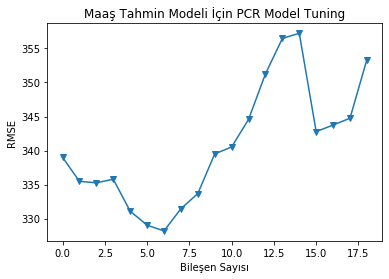

In [59]:
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [60]:
#Burda en az hatayı 6 bileşende aldığımızı görüyoruz.
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:6])
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.82659830945016


In [61]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.11987000962233


## Ridge Regression

In [62]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division", "NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [63]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [64]:
from sklearn.linear_model import Ridge

In [67]:
ridge_model = Ridge(alpha = 0.1)
ridge_model = ridge_model.fit(X_train, y_train)

In [68]:
ridge_model

Ridge(alpha=0.1)

In [70]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [72]:
#Tahmin
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

357.02392526076613

In [73]:
#Model Tuning
lambdalar = 10**np.linspace(10,-2,100)*0.5 
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [74]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar,
                  scoring = "neg_mean_squared_error",
                  normalize = True)

In [75]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [76]:
ridge_cv.alpha_

0.7599555414764666

In [77]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [78]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

386.6826429756415

Burda tuning ettikten sonra hata daha fazla çıktı ama bu demek değildir ki daha kötü sonuç elde ettik. Hiç görmediği bir veri setinde tuning edilmiş model daha iyi çalışacaktır

## Lasso Regression

In [79]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [80]:
from sklearn.linear_model import Lasso

In [81]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

In [82]:
lasso_model

Lasso(alpha=0.1)

In [83]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

In [84]:
#Tahmin
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [85]:
y_pred = lasso_model.predict(X_test)

In [86]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.7545270148768

In [87]:
#Model Tuning
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [88]:
from sklearn.linear_model import LassoCV

In [89]:
lasso_cv_model = LassoCV(alphas = None,
                        cv = 10,
                        max_iter = 10000,
                        normalize = True) #alpha değerleri tanımlı değerlerden gelcek.

In [90]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [91]:
lasso_cv_model.alpha_

0.39406126432470073

In [92]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [93]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=0.39406126432470073)

In [94]:
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.52263769583686